## **Análise Estatística das Variáveis Clínicas e Demográficas no Contexto de Metástases Hepáticas e Pulmonares**

Nesta seção, realizamos uma análise estatística detalhada das variáveis clínicas e demográficas presentes na base de dados SEER, com o objetivo de compreender melhor os fatores associados à presença de metástases hepáticas e pulmonares em pacientes. A análise é dividida em etapas fundamentais:

* Correlação Entre Variáveis: Avaliamos a relação entre as variáveis preditoras e o status de metástase usando matrizes de correlação para diferentes cenários: sem balanceamento, com balanceamento por SMOTE e por undersampling.
* Exploração Inicial dos Dados: Verificamos as distribuições das variáveis categóricas e contínuas, identificando possíveis padrões ou desequilíbrios nos dados.

Essa análise fornece uma base para a aplicação de métodos mais avançados, como modelagem preditiva e regressão multivariada, ao destacar padrões significativos e associações entre as características do paciente e a presença de metástases.


Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

 Carregamento e Pré-processamento dos Dados

In [ ]:
# Carregar o dataset
df = pd.read_csv('https://raw.githubusercontent.com/aureavaleria/Reprodu-o/main/export.csv')

# Substituir valores problemáticos por NaN ou 'Desconhecido'
df.fillna('Unknown', inplace=True)

# Função para combinar as metástases no fígado e pulmão em uma única coluna binária
def combine_mets_binary(row):
    if row['SEER Combined Mets at DX-liver (2010+)'] == 'Yes' or row['SEER Combined Mets at DX-lung (2010+)'] == 'Yes':
        return 1  # Com metástase
    else:
        return 0  # Sem metástase

# Aplicar a função para criar a nova coluna binária
df['Binary Mets'] = df.apply(combine_mets_binary, axis=1)

# Exibir a porcentagem de desequilíbrio na coluna 'Binary Mets'
total = len(df)
num_mets = df['Binary Mets'].sum()
num_no_mets = total - num_mets

perc_mets = (num_mets / total) * 100
perc_no_mets = (num_no_mets / total) * 100

print(f"Total de registros: {total}")
print(f"Pacientes com metástase: {num_mets} ({perc_mets:.2f}%)")
print(f"Pacientes sem metástase: {num_no_mets} ({perc_no_mets:.2f}%)")

# Remover as colunas originais de metástase para evitar duplicação
X = df.drop(columns=['Binary Mets', 'SEER Combined Mets at DX-liver (2010+)', 'SEER Combined Mets at DX-lung (2010+)'])
y = df['Binary Mets']

# Converter colunas categóricas para numéricas usando LabelEncoder
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':  # Verifica se a coluna é categórica
        X[col] = label_encoder.fit_transform(X[col])

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar a distribuição de y_train após a divisão
print("Distribuição de y_train antes do balanceamento:", np.bincount(y_train))

# Aplicar o escalonamento (padronização) nos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Análise de Correlação sem balanceamento, com Smote, e, Undersampling

Total de registros: 53463
Pacientes com metástase: 7909 (14.79%)
Pacientes sem metástase: 45554 (85.21%)
Distribuição de y_train antes do balanceamento: [36443  6327]


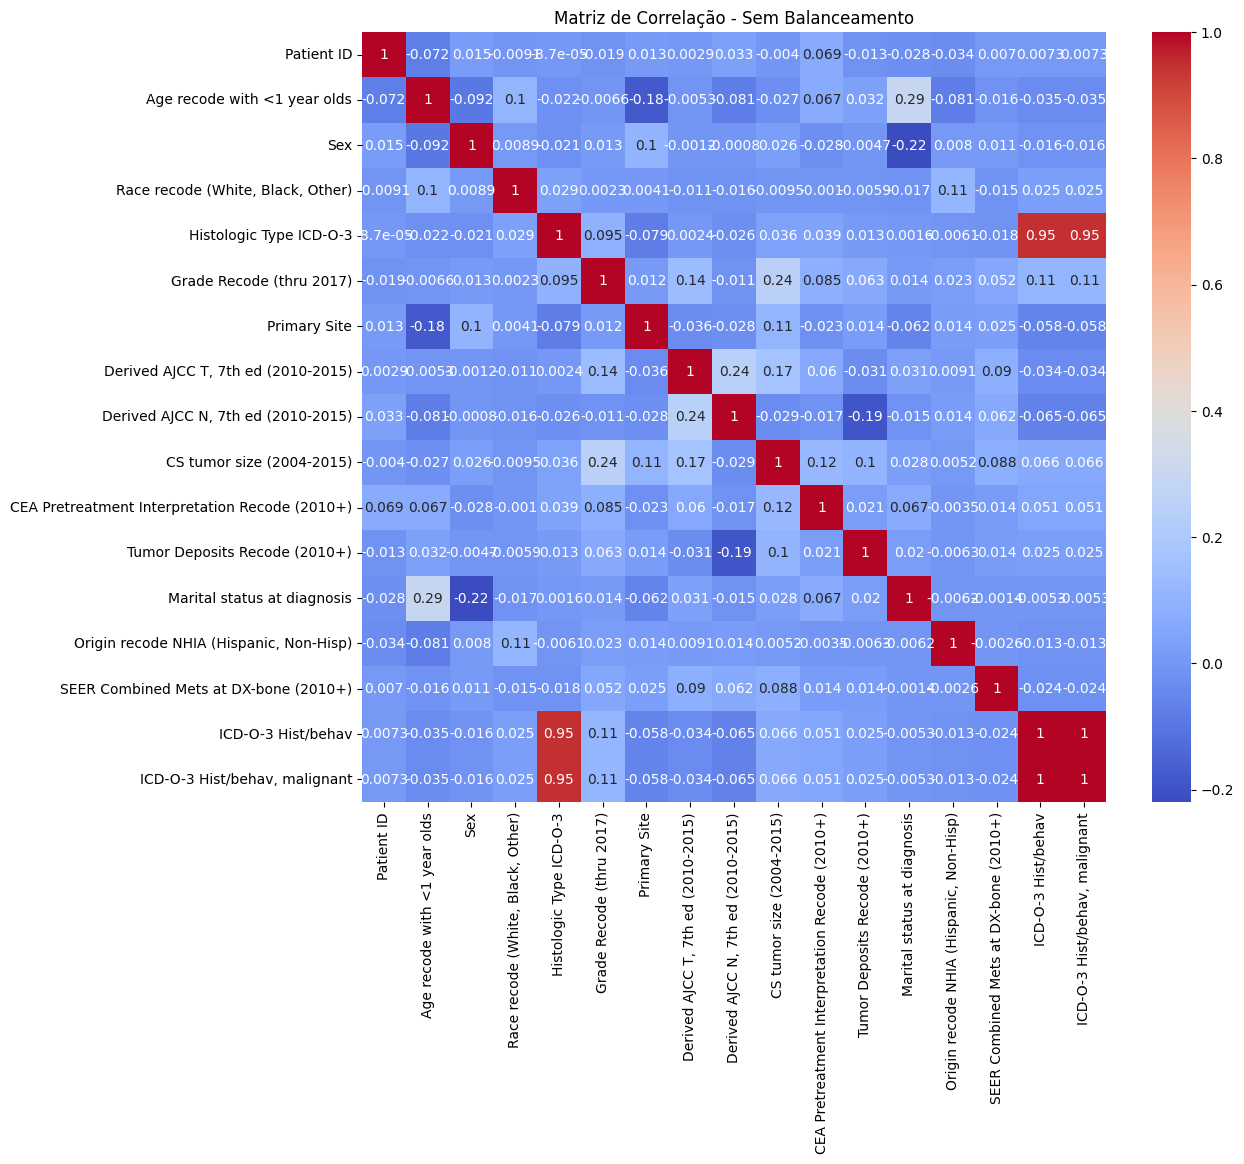

Distribuição de y_train após SMOTE (Over-sampling): [36443 36443]


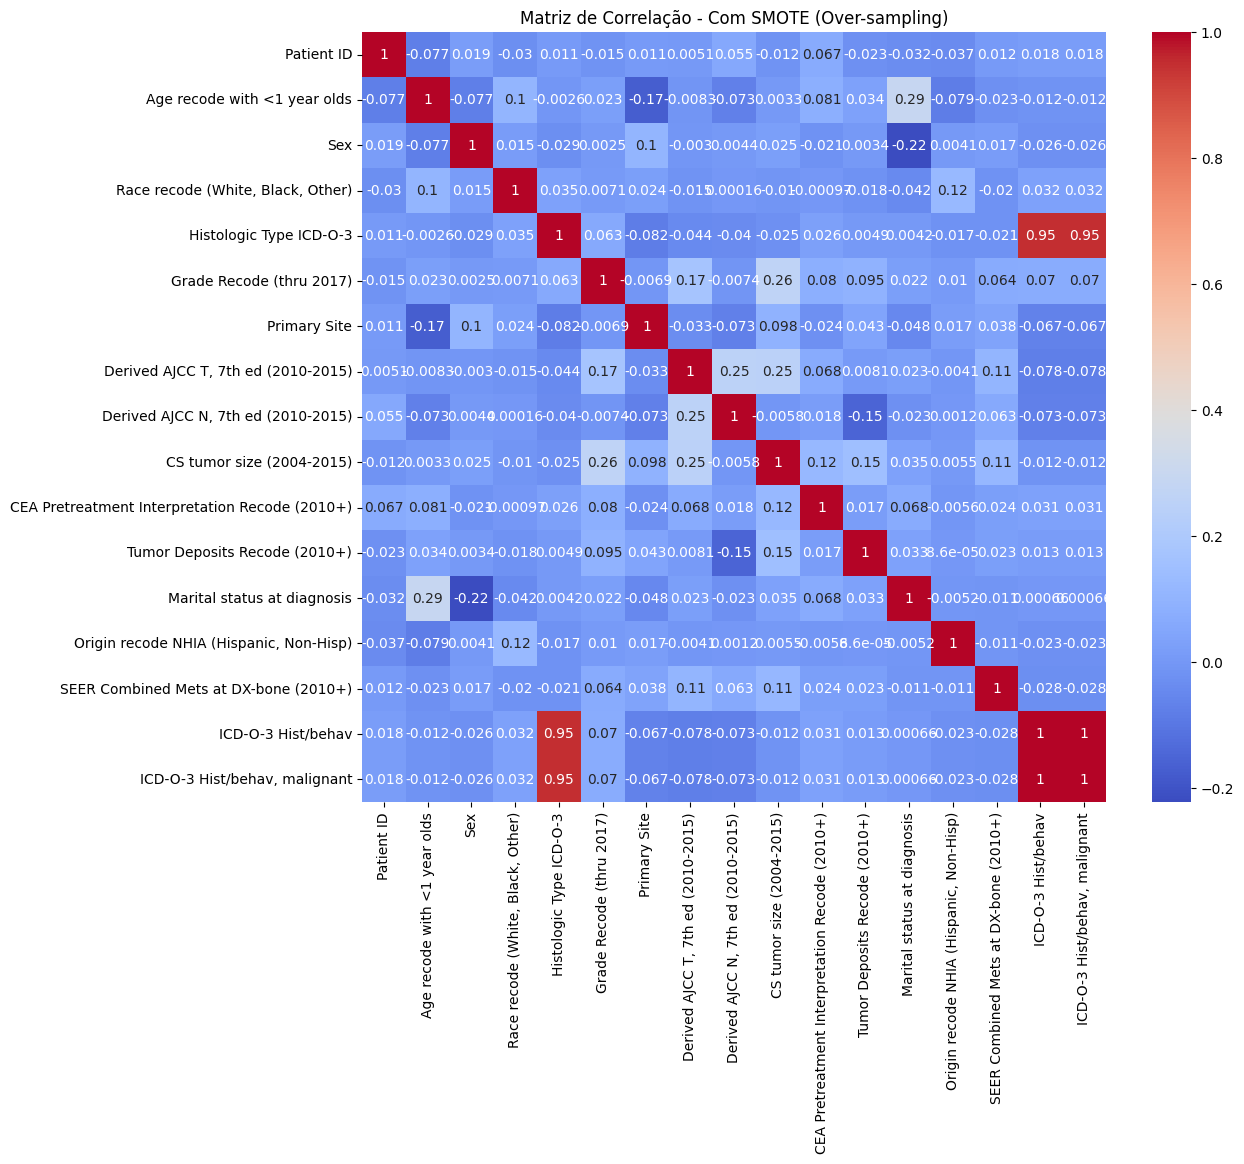

Distribuição de y_train após Under-sampling: [6327 6327]


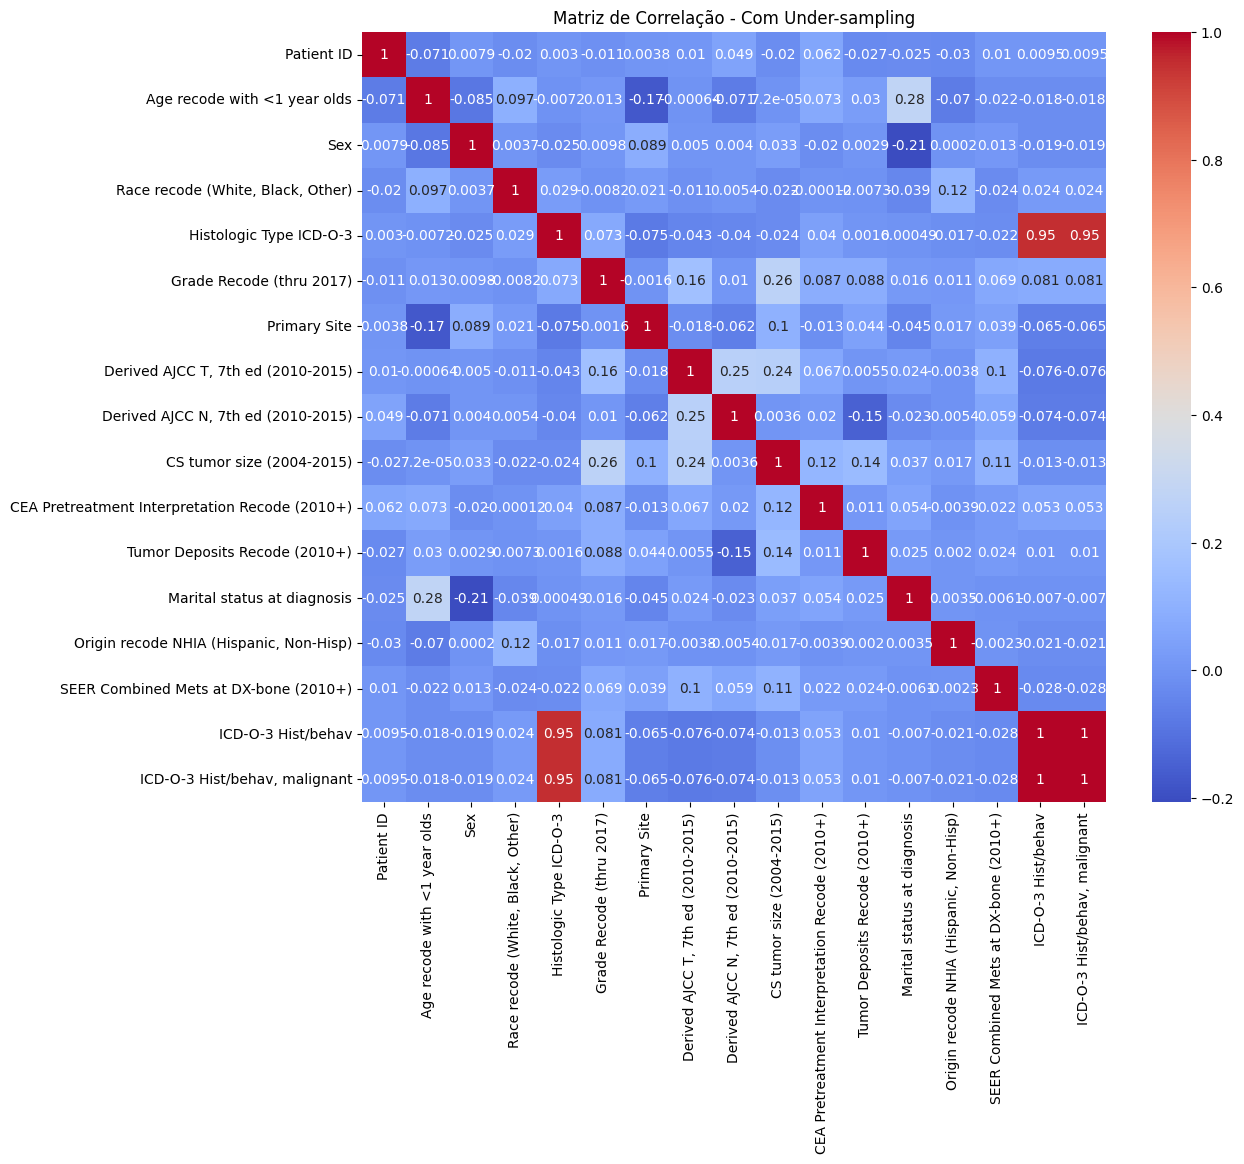

In [13]:
### Parte 1: Matriz de correlação sem balanceamento ###
corr_matrix_original = pd.DataFrame(X_train_scaled, columns=X.columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_original, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Sem Balanceamento')
plt.show()

### Parte 2: Balanceamento com SMOTE (Over-sampling) ###
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Verificar a distribuição após SMOTE
print("Distribuição de y_train após SMOTE (Over-sampling):", np.bincount(y_train_smote))

### Matriz de correlação com SMOTE ###
corr_matrix_smote = pd.DataFrame(X_train_smote, columns=X.columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_smote, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Com SMOTE (Over-sampling)')
plt.show()

### Parte 3: Balanceamento com Under-sampling ###
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train_scaled, y_train)

# Verificar a distribuição após Under-sampling
print("Distribuição de y_train após Under-sampling:", np.bincount(y_train_under))

### Matriz de correlação com Under-sampling ###
corr_matrix_under = pd.DataFrame(X_train_under, columns=X.columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_under, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Com Under-sampling')
plt.show()


**Análise Descritiva**

Proporções e Frequências

In [14]:
# Proporções e frequências para variáveis categóricas
categorical_vars = [
    'Age recode with <1 year olds', 'Sex', 'Race recode (White, Black, Other)',
    'Derived AJCC T, 7th ed (2010-2015)', 'Derived AJCC N, 7th ed (2010-2015)'
]

for var in categorical_vars:
    print(f"\nDistribuição para {var}:")
    print(df[var].value_counts(normalize=True) * 100)  # Proporções
    print(df[var].value_counts())  # Frequência absoluta



Distribuição para Age recode with <1 year olds:
Age recode with <1 year olds
65-69 years    12.462825
60-64 years    12.006434
70-74 years    11.761405
75-79 years    11.241419
85+ years      11.056245
80-84 years    10.665320
55-59 years    10.180873
50-54 years     9.653405
45-49 years     5.259712
40-44 years     2.955315
35-39 years     1.466435
30-34 years     0.791201
25-29 years     0.355386
20-24 years     0.121579
15-19 years     0.016834
10-14 years     0.005611
Name: proportion, dtype: float64
Age recode with <1 year olds
65-69 years    6663
60-64 years    6419
70-74 years    6288
75-79 years    6010
85+ years      5911
80-84 years    5702
55-59 years    5443
50-54 years    5161
45-49 years    2812
40-44 years    1580
35-39 years     784
30-34 years     423
25-29 years     190
20-24 years      65
15-19 years       9
10-14 years       3
Name: count, dtype: int64

Distribuição para Sex:
Sex
Male      52.801003
Female    47.198997
Name: proportion, dtype: float64
Sex
Male     

Tabelas Cruzadas

In [15]:
# Comparar variáveis categóricas com o status de metástase
for var in categorical_vars:
    crosstab = pd.crosstab(df['SEER Combined Mets at DX-liver (2010+)'], df[var], normalize='index') * 100
    print(f"\nTabela cruzada para {var} em relação à metástase no fígado:")
    print(crosstab)



Tabela cruzada para Age recode with <1 year olds em relação à metástase no fígado:
Age recode with <1 year olds            10-14 years  15-19 years  20-24 years  \
SEER Combined Mets at DX-liver (2010+)                                          
No                                         0.006486     0.019457     0.123230   
Unknown                                    0.000000     0.000000     0.000000   
Yes                                        0.000000     0.000000     0.111173   

Age recode with <1 year olds            25-29 years  30-34 years  35-39 years  \
SEER Combined Mets at DX-liver (2010+)                                          
No                                         0.348070     0.750189     1.383634   
Unknown                                    0.000000     0.000000     0.000000   
Yes                                        0.403002     1.056142     2.001112   

Age recode with <1 year olds            40-44 years  45-49 years  50-54 years  \
SEER Combined Mets at D

**Análise Univariada**

Testes Qui-Quadrado ou Fisher

In [16]:
import pandas as pd
from scipy.stats import fisher_exact, chi2_contingency

# Função para combinar metástases hepáticas e pulmonares em uma única coluna binária
def combine_mets_binary(row):
    if row['SEER Combined Mets at DX-liver (2010+)'] == 'Yes' or row['SEER Combined Mets at DX-lung (2010+)'] == 'Yes':
        return 1  # Com metástase
    else:
        return 0  # Sem metástase

# Criar a coluna 'Binary Mets'
df['Binary Mets'] = df.apply(combine_mets_binary, axis=1)

# Lista de variáveis categóricas para análise
categorical_vars = [
    'Age recode with <1 year olds',
    'Sex',
    'Race recode (White, Black, Other)',
    'Derived AJCC T, 7th ed (2010-2015)',
    'Derived AJCC N, 7th ed (2010-2015)',
    'Grade Recode (thru 2017)',
    'Marital status at diagnosis'
]

# Realizar análise estatística para cada variável categórica em relação a 'Binary Mets'
results = {}

for var in categorical_vars:
    print(f"\nAnalisando a variável: {var}")
    contingency_table = pd.crosstab(df['Binary Mets'], df[var])
    print(f"Tabela de contingência:\n{contingency_table}")

    if contingency_table.shape == (2, 2):
        # Teste de Fisher
        _, p_fisher = fisher_exact(contingency_table)
        results[var] = {"Test": "Fisher", "p-value": p_fisher}
        print(f"Teste de Fisher para '{var}': p-valor = {p_fisher:.4f}")
    else:
        # Teste Qui-Quadrado
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results[var] = {"Test": "Chi-Square", "Chi2": chi2, "p-value": p, "dof": dof}
        print(f"Teste Qui-Quadrado para '{var}': Chi2 = {chi2:.4f}, p-valor = {p:.4f}, DOF = {dof}")

# Converter os resultados em DataFrame para visualização
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nResumo dos Resultados:")
print(results_df)





Analisando a variável: Age recode with <1 year olds
Tabela de contingência:
Age recode with <1 year olds  10-14 years  15-19 years  20-24 years  \
Binary Mets                                                           
0                                       2            9           57   
1                                       1            0            8   

Age recode with <1 year olds  25-29 years  30-34 years  35-39 years  \
Binary Mets                                                           
0                                     158          341          631   
1                                      32           82          153   

Age recode with <1 year olds  40-44 years  45-49 years  50-54 years  \
Binary Mets                                                           
0                                    1277         2249         4371   
1                                     303          563          790   

Age recode with <1 year olds  55-59 years  60-64 years  65-69 years 

**Análise Multivariada**

Regressão Logística Multivariada

In [19]:
import statsmodels.api as sm

# Certificar que 'Binary Mets' é numérico
df['Binary Mets'] = pd.to_numeric(df['Binary Mets'], errors='coerce')

# Selecionar apenas as colunas relevantes (excluindo as não numéricas)
X = df[['Age recode with <1 year olds', 'Sex', 'Race recode (White, Black, Other)',
        'Derived AJCC T, 7th ed (2010-2015)', 'Derived AJCC N, 7th ed (2010-2015)',
        'Grade Recode (thru 2017)', 'Marital status at diagnosis']]

# Codificar variáveis categóricas para numéricas
X = pd.get_dummies(X, drop_first=True)

# Definir o alvo (variável dependente)
y = df['Binary Mets']

# Ajustar o modelo de regressão logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumo dos resultados
print(result.summary())


         Current function value: 0.325441
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            Binary Mets   No. Observations:                53463
Model:                          Logit   Df Residuals:                    53416
Method:                           MLE   Df Model:                           46
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.2235
Time:                        00:08:38   Log-Likelihood:                -17399.
converged:                      False   LL-Null:                       -22407.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
Age recode with <1 year olds_15-19 years        